# Project: Gross domestic product per capita based on purchasing-power-parity [GDP and PPP]



## Getting the data

Using the [NY.GDP.PCAP.PP.CD](http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) indicator, GDP per capita in current 'international dollars', would make for a like-for-like comparison between countries, because it would take population and purchasing power into account.

In [1]:
import sys

sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.1.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.1
pytest: 3.0.7
pip: 9.0.1
setuptools: 27.2.0
Cython: 0.25.2
numpy: 1.12.1
scipy: 0.19.0
xarray: None
IPython: 5.3.0
sphinx: 1.5.6
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.2.2
numexpr: 2.6.2
feather: None
matplotlib: 2.0.2
openpyxl: 2.4.7
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.3
bs4: 4.6.0
html5lib: 0.999
sqlalchemy: 1.1.9
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: 0.4.0


In [3]:
# File can be downloaded from: http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
# First few rows have to be removed to make it a proper CSV file.
# We are reading the file after truncating the first 2 rows.

gdpPpp = read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2.csv')

gdpPpp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36015.070460,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1283.040986,1525.517054,1629.167290,1712.588720,1934.285634,1941.610049,1942.484610,1925.165228,NaN,NaN
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6298.012440,6284.274905,6360.848980,6524.481181,6758.278050,7096.786468,7327.379490,7386.700843,NaN,NaN
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8228.328189,8823.861485,9646.582277,10209.200987,10526.868686,10578.789110,11307.549276,11479.087460,NaN,NaN
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the data

Inspecting the data with `head()` and `tail()` shows that:

* We have a lot of columns with `NaN`s. A brief look at the data shows that we have proper data from year 1990 onwards. So, we drop all columns before 1990 and even 2016, as it seems it is incomplete data.
* We also drop columns for `Country Code`, `Indicator Name`, `Indicator Code` as we don't need them.


In [4]:
colsToDrop = [str(x) for x in list(range(1960, 1991))]
colsToDrop = colsToDrop + ['Country Code', 'Indicator Name', 'Indicator Code', '2016', 'Unnamed: 61']

gdpPppReset = gdpPpp.drop(colsToDrop, 1)
gdpPppReset.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36015.070460,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1095.655628,1245.059223,1283.040986,1525.517054,1629.167290,1712.588720,1934.285634,1941.610049,1942.484610,1925.165228
2,Angola,3076.256008,2836.129244,2115.395101,2165.015070,2366.284056,2603.074343,2778.743543,2918.451406,2972.321938,...,4614.590809,5613.232196,6298.012440,6284.274905,6360.848980,6524.481181,6758.278050,7096.786468,7327.379490,7386.700843
3,Albania,1992.082585,1902.294879,2147.584702,2389.957619,2781.426410,3109.197384,2837.364175,3208.971421,3690.680883,...,6634.754475,7289.605417,8228.328189,8823.861485,9646.582277,10209.200987,10526.868686,10578.789110,11307.549276,11479.087460
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Transforming the data

* There are a lot of columns empty or `NaN` in the data. It is always preferable to fill all such rows for a value which is in the trend. One such example might be mean. So, we calculate mean for each row.
* Then transform the data of each row such that we fill all `NaN`s in that row with the mean of the corresponding row.
* Finally we remove any rows which have `NaN`s since such rows do not have any data.
* We also set the index as `Country Name` for ease of analysis.

In [5]:
mean = gdpPppReset.mean(axis=1)

mean.head()

0    36015.070460
1     1432.553217
2     4287.223665
3     5944.463125
4             NaN
dtype: float64

In [6]:
for i, col in enumerate(gdpPppReset):
    gdpPppReset.iloc[:, i] = gdpPppReset.iloc[:, i].fillna(mean)

gdpPppMean = gdpPppReset.set_index('Country Name').dropna()
gdpPppMean.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,...,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460,36015.070460
Afghanistan,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,1432.553217,...,1095.655628,1245.059223,1283.040986,1525.517054,1629.167290,1712.588720,1934.285634,1941.610049,1942.484610,1925.165228
Angola,3076.256008,2836.129244,2115.395101,2165.015070,2366.284056,2603.074343,2778.743543,2918.451406,2972.321938,3036.559728,...,4614.590809,5613.232196,6298.012440,6284.274905,6360.848980,6524.481181,6758.278050,7096.786468,7327.379490,7386.700843
Albania,1992.082585,1902.294879,2147.584702,2389.957619,2781.426410,3109.197384,2837.364175,3208.971421,3690.680883,4026.537421,...,6634.754475,7289.605417,8228.328189,8823.861485,9646.582277,10209.200987,10526.868686,10578.789110,11307.549276,11479.087460
Arab World,6385.381013,6749.267453,6987.866035,7176.833291,7308.406372,7630.252892,7963.284408,8336.286084,8581.392359,9013.781607,...,12201.455347,12912.437129,13663.844068,13705.455885,14197.184585,14577.135598,15294.650870,15736.276043,16114.994213,16451.502361


## Charting the data

Now that we have all the data, we can create as many charts as possible to understand the data and find insights.

### Charts with each Year as a Series

Chat with year series more or less does not give any insight as there are way too many countries and 25 columns for each country.

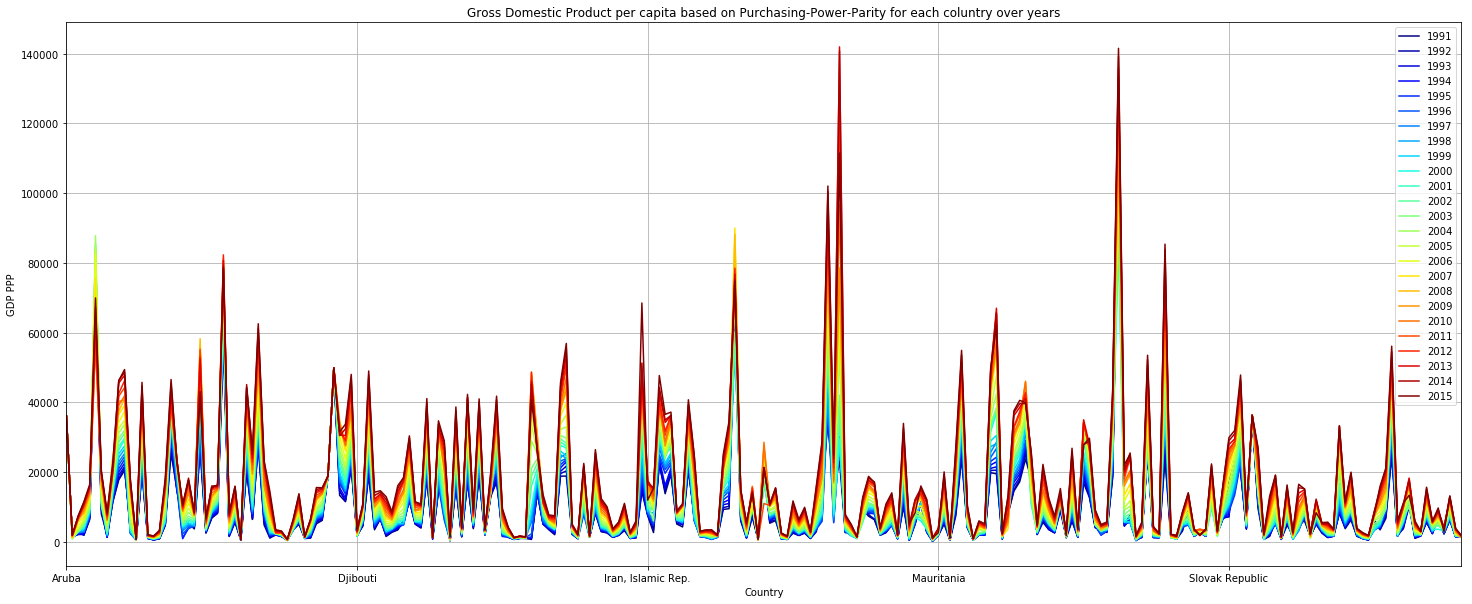

In [7]:
%matplotlib inline

from matplotlib import cm
ax = gdpPppMean.plot(title='Gross Domestic Product per capita based on Purchasing-Power-Parity for each coluntry over years', 
                     colormap=cm.jet, grid=True, figsize=(25, 10));
ax.set_xlabel("Country");
ax.set_ylabel("GDP PPP");

So we take other approach and plot various charts with each Country as a Series.

### Charts with each Country as a Series 

Though we do understand a trend, there is a lot of overlapping series. So, its better to divide the Countries based on any criteria to understand better.

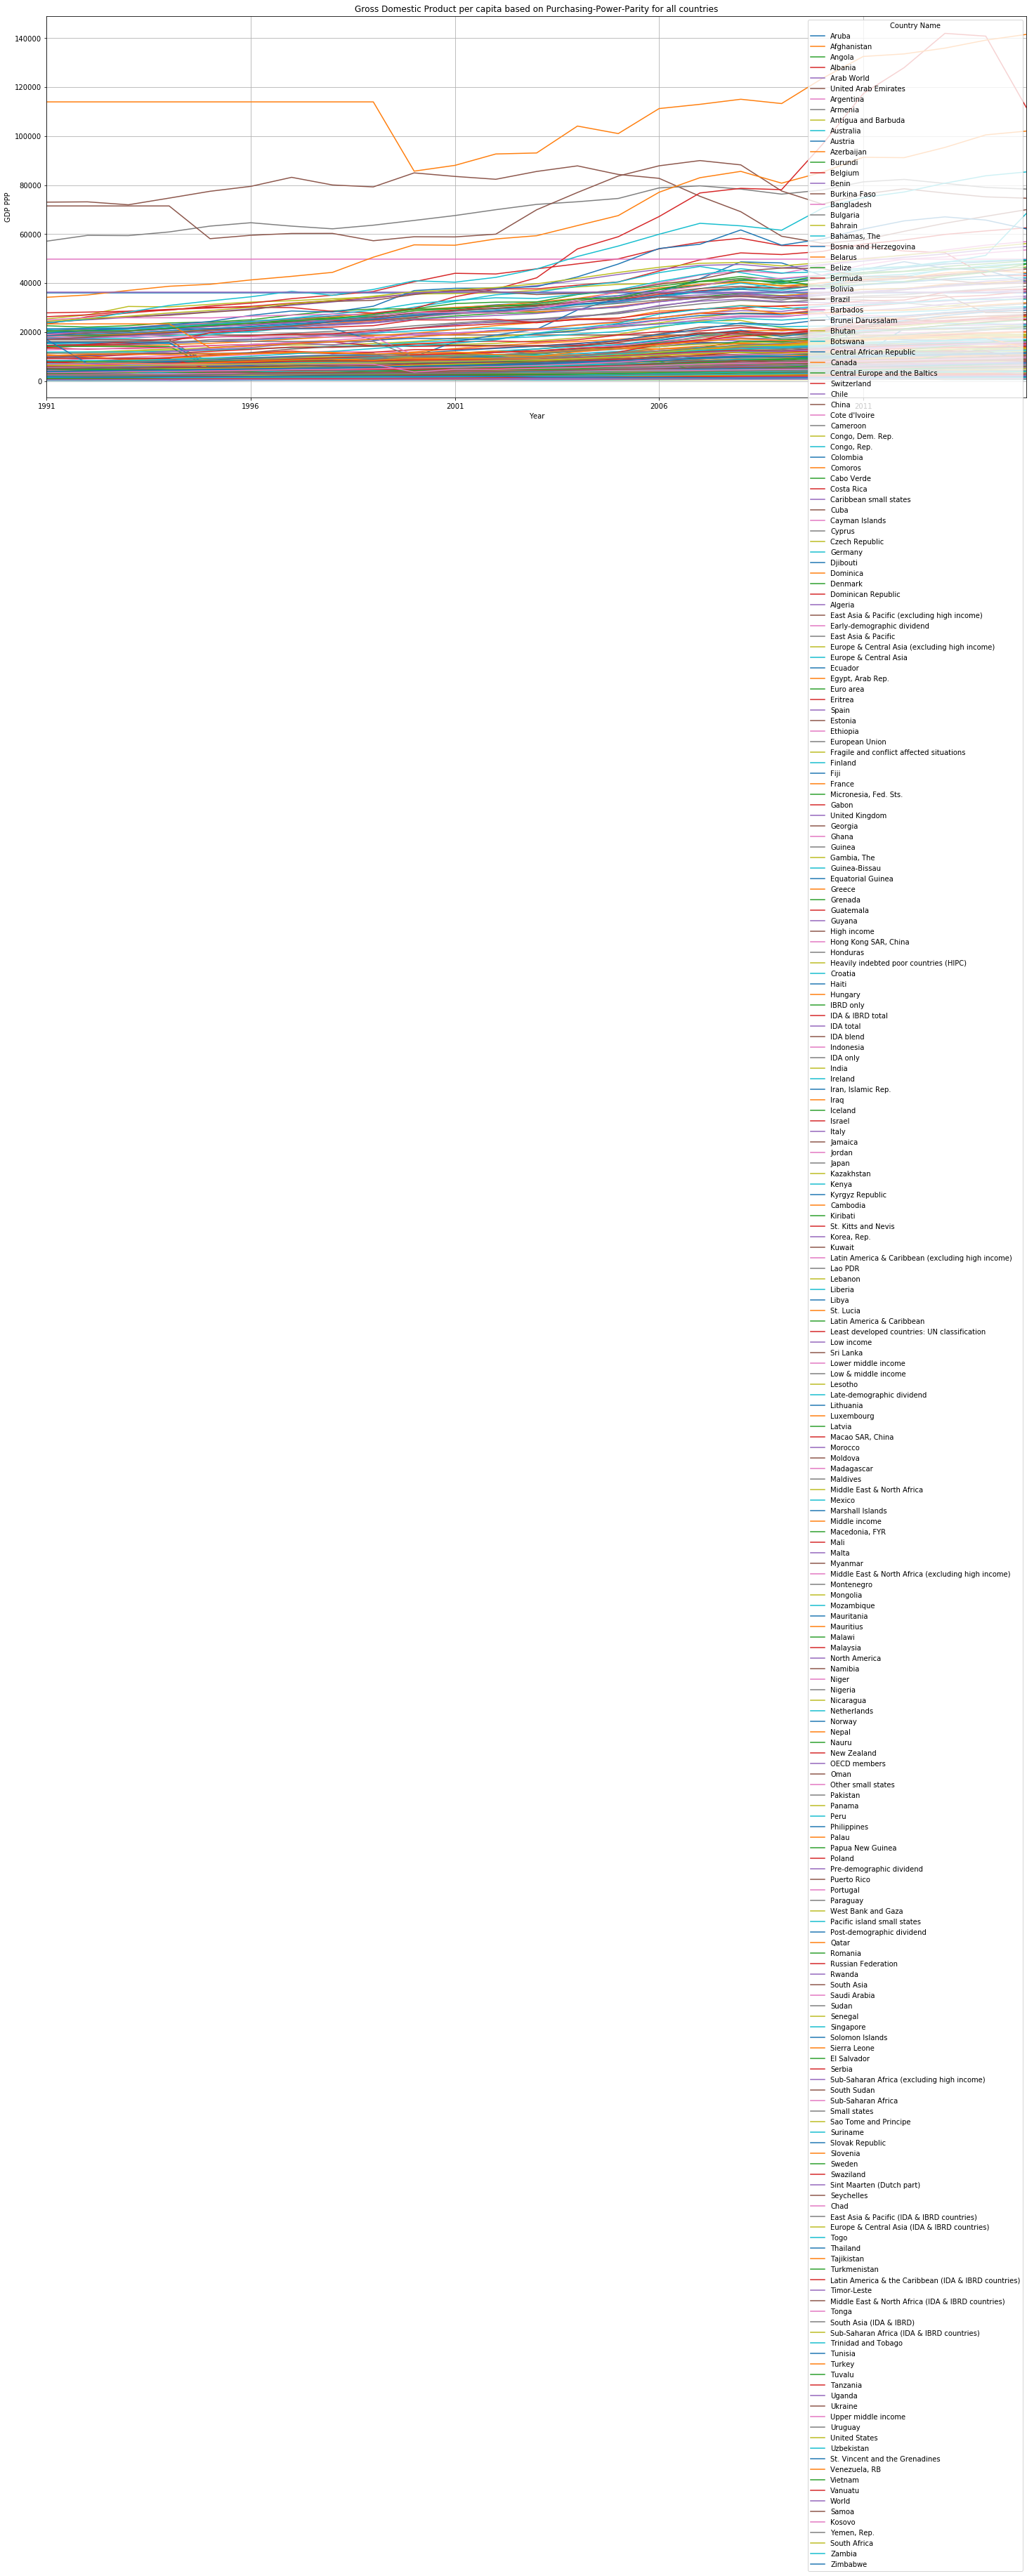

In [8]:
ax = gdpPppMean.T.plot.line(title='Gross Domestic Product per capita based on Purchasing-Power-Parity for all countries', 
                            grid=True, figsize=(25, 10));
ax.set_xlabel("Year");
ax.set_ylabel("GDP PPP");

### BRICS

Plot the countries on the basis of various factors. BRICS as an example.

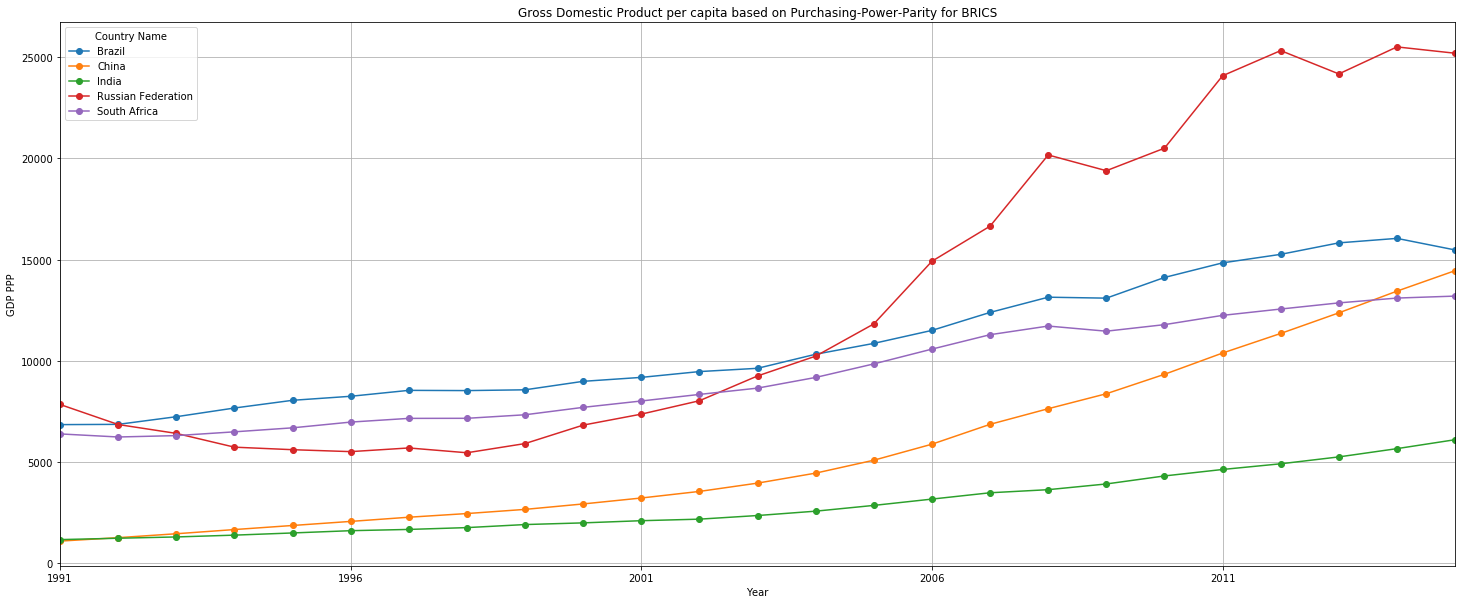

In [9]:
BRICS_COUNTRIES = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
bricsgdpPppp = gdpPppMean.loc[gdpPppMean.index.isin(BRICS_COUNTRIES)]

ax = bricsgdpPppp.T.plot.line(title='Gross Domestic Product per capita based on Purchasing-Power-Parity for BRICS', 
                              marker='o', grid=True, figsize=(25, 10));
ax.set_xlabel("Year");
ax.set_ylabel("GDP PPP");

### Countries with high Human Development Index

List as per Wiki [https://en.wikipedia.org/wiki/Developed_country](https://en.wikipedia.org/wiki/Developed_country)


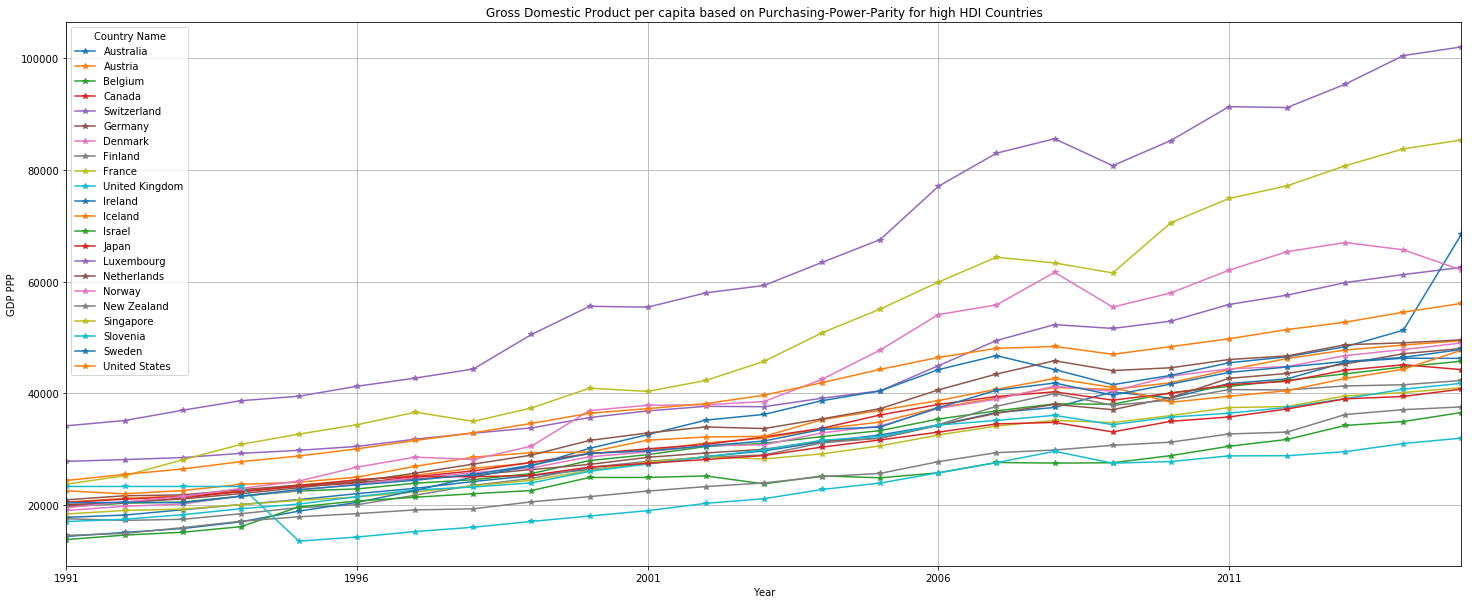

In [10]:
HIGH_HDI_COUNTRIES = ['Norway', 'Australia', 'Switzerland', 'Germany', 'Denmark', 'Singapore', 'Netherlands', 
                   'Ireland', 'Iceland', 'Canada', 'United States', 'Hong Kong', 'New Zealand', 'Sweden', 
                   'Liechtenstein', 'United Kingdom', 'Japan', 'South Korea', 'Israel', 'Luxembourg', 'France', 
                   'Belgium', 'Finland', 'Austria', 'Slovenia']
high_hdi_gdpPppp = gdpPppMean.loc[gdpPppMean.index.isin(HIGH_HDI_COUNTRIES)]

ax = high_hdi_gdpPppp.T.plot.line(title='Gross Domestic Product per capita based on Purchasing-Power-Parity for high HDI Countries', 
                                  marker='*', grid=True, figsize=(25, 10));
ax.set_xlabel("Year");
ax.set_ylabel("GDP PPP");

### Countries in G7

List as per Wiki [https://en.wikipedia.org/wiki/Group_of_Seven](https://en.wikipedia.org/wiki/Group_of_Seven)


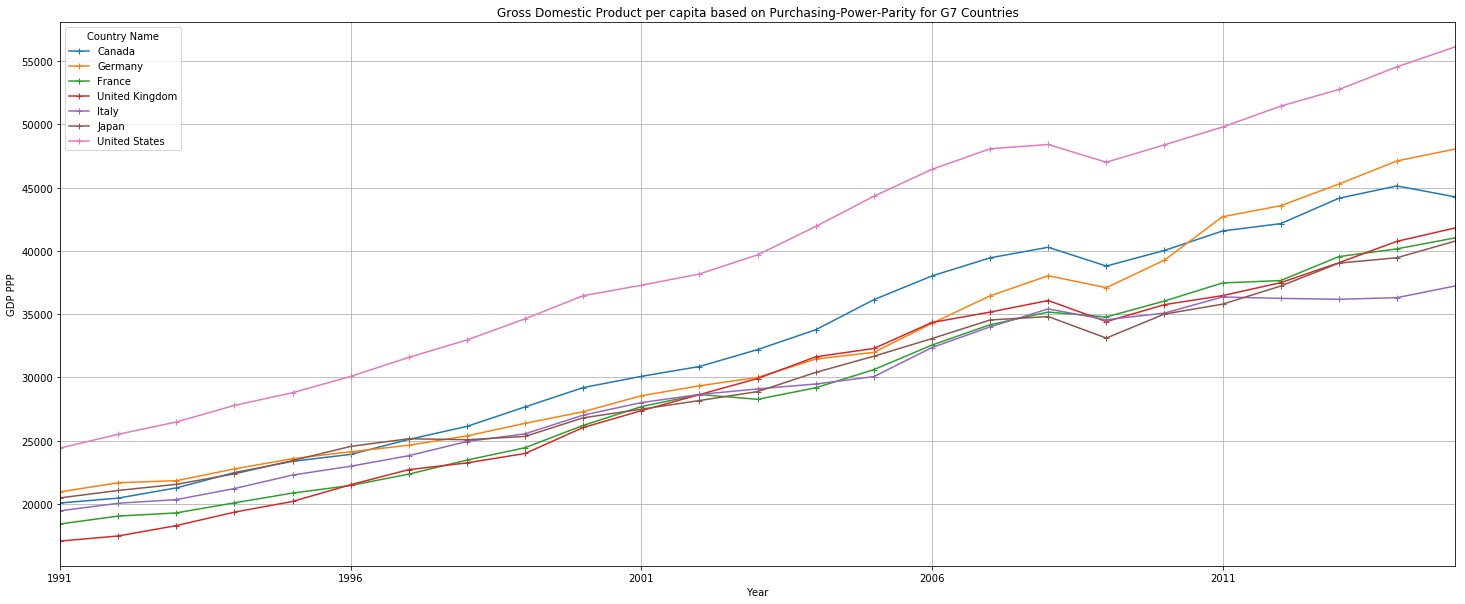

In [11]:
G7_COUNTRIES = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
g7_gdpPppp = gdpPppMean.loc[gdpPppMean.index.isin(G7_COUNTRIES)]

ax = g7_gdpPppp.T.plot.line(title='Gross Domestic Product per capita based on Purchasing-Power-Parity for G7 Countries', 
                            marker='+', grid=True, figsize=(25, 10));
ax.set_xlabel("Year");
ax.set_ylabel("GDP PPP");